In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

In [3]:
"""Ta modul vsebuje implementacijo razreda (5,0)-Nanotubičnega fulerena."""

import math
from typing import Union

import matplotlib.pyplot as plt
import networkx as nx


class ntf:
    """
    Razred za predstavitev (5,0)-Nanotubičnega fulerena z več orbitalami.

    Molekularna struktura: C_{10k}, kjer je k = 2, 3, 4, ...

    Atributi:
    --------
        k (int): Red molekule, ki določa število orbital.
        zigzag (bool): Določa, ali se povezave dekagonov izmenjujejo med sodimi ali lihimi vozlišči.
        G (networkx.Graph): Grafična predstavitev molekule.
        pos (dict): Pozicije vozlišč za vizualizacijo.

    Metode:
    --------
        plot_graph(): Nariše grafično predstavitev molekule.
        convert_graph(): Pretvori graf NetworkX v določeno predstavitev.
    """

    def __init__(self, k: int, zigzag: bool = True) -> None:
        self.k: int = k
        self.zigzag: bool = zigzag
        self.G: nx.Graph = None
        self.pos: dict = None
        self.create_graph()

    @staticmethod
    def validate_order_class(k: int) -> None:
        """
        Preveri veljavnost reda molekule.

        Parametri:
        --------
            k (int): Red molekule, ki določa število orbital.

        Izjeme:
        --------
            ValueError: Če je k manjše od 2.
        """
        if k < 2:
            raise ValueError("Red molekule (k) mora biti >= 2.")

    def create_graph(self) -> None:
        """Ustvari nx-graf za (5,0)-Nanotubični fuleren."""
        self.G = nx.Graph()
        self.pos = {}

        # Število dekagonalnih orbital (brez pentagonalnih plasti)
        n: int = self.k - 1

        # Dodaj centralni pentagon (0-ta orbita)
        for i in range(5):
            angle = i * 2 * math.pi / 5 + math.pi / 4
            self.pos[i] = (
                math.cos(angle) * 0.8,
                math.sin(angle) * 0.8,
            )
            self.G.add_edge(i, (i + 1) % 5)

        # Dodaj dekagonalne orbite (10-kotne plasti)
        for orbit in range(1, n + 1):
            offset_x, offset_y = orbit + 0.5, orbit + 0.5

            # Dodaj vozlišča in povezave za vsako orbitalo
            for i in range(10):
                angle = i * 2 * math.pi / 10
                pos_idx = 5 + (orbit - 1) * 10 + i 
                self.pos[pos_idx] = (
                    math.cos(angle) * offset_x, # x koordinata
                    math.sin(angle) * offset_y, # y koordinata
                )

                # Dodaj povezave znotraj iste orbite (formiranje dekagonov)
                self.G.add_edge(pos_idx, 5 + (orbit - 1) * 10 + (i + 1) % 10)

            # Poveži orbitale
            if orbit == 1:
                for i in range(5):
                    even_idx = i * 2 % 10  # Povezave na sode indekse
                    self.G.add_edge(i, 6 + even_idx)
            # Povezave med dekagoni
            else:
                for i in range(10):
                    # Uporabi zig-zag vzorec med dekagoni 
                    if self.zigzag:
                        if orbit % 2 == 0 and i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                        elif orbit % 2 != 0 and i % 2 != 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                    # Alternirajoče povezave med dekagoni
                    else:
                        if i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )

        # Dodaj zadnjo pentagonalno orbito 
        for i in range(5):
            angle = i * 2 * math.pi / 5
            pos_idx = 15 + (n - 1) * 10 + i
            self.pos[pos_idx] = (
                math.cos(angle) * (n + 1) * 1.3,   # x koordinata
                math.sin(angle) * (n + 1) * 1.3,   # y koordinata
            )

            # Poveži končni pentagon z zadnjo dekagonalno orbitalo. 
            if (n + 1) % 2 == 0:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2) % 10
            else:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2 + 1) % 10

            # Dodaj povezave med pentagonom in dekagonom 
            self.G.add_edge(pos_idx, decagon_idx)
            # Dodaj povezave v pentagonu samem 
            self.G.add_edge(pos_idx, 15 + (n - 1) * 10 + (i + 1) % 5)

    def convert_graph(
        self, format: str = "adjacency_list"
    ) -> Union[dict[int, list[int]], list[list[int]], list[tuple]]:
        
        """
        pretvori NetworkX graf.

        Parameters:
        --------
            format (str): Želen format za graf. Možnosti:
            - `adjacency_list`
            - `adjacency_matrix`
            - `edge_list`

        Vrne:
        --------
            Prikaz grafa v želenem formatu.

        Raises:
        --------
            ValueError: If the specified format is not supported.
        """
        if format == "adjacency_list":
            return {node: list(self.G.neighbors(node)) for node in self.G.nodes()}
        elif format == "adjacency_matrix":
            return nx.to_numpy_array(self.G).tolist()
        elif format == "edge_list":
            return list(self.G.edges())
        else:
            raise ValueError(
                f"Unsupported format: {format}, choose from 'adjacency_list', 'adjacency_matrix', 'edge_list'."
            )

    def plot_graph(
        self,
        node_size: int = 25,
        font_size: int = 0,
        node_color: str = "black",
        edge_color: str = "black",
    ) -> None:
        
        """
        Nariše grafični prikaz (5,0)-Nanotubičnega fulerena.

        Parametri:
        --------
            node_size (int): Velikost vozlišč na grafu.
            font_size (int): Velikost pisave za oznake vozlišč.
            node_color (str ali seznam): Barva vozlišč.
            edge_color (str ali seznam): Barva povezav.
        """

        plt.figure(figsize=(8, 8))
        nx.draw_networkx(
            self.G,
            self.pos,
            with_labels=True,
            node_size=node_size,
            font_size=font_size,
            node_color=node_color,
            edge_color=edge_color,
        )
        plt.title(r"(5,0)-Nanotubical Fullerene: $C_{(10 \cdot %d)}$" % self.k)
        plt.show()  


In [4]:
def floyd_warshall(graph: nx.Graph) -> list[list[float]]:
    """
    Izvedemo floyd warshallov algoritem na grafu.

    Parametri:
    graf (nx.Graph): Vhodni graf.

    Vrne:
    list[list[float]]: Matriko distanc ki nam poda najkrajše razdalje med vsemi vozlišči.
    """
    # Število vozlišč
    nodes = list(graph.nodes())
    n = len(nodes)

    # Ustvarimo matriko sosednosti
    adj_matrix = np.full((n, n), float("inf"))  #Vse elemente damo na inf
    np.fill_diagonal(adj_matrix, 0)  # Vse diagonalne elemente damo na 0 (razdalja od vozlišča do samega sebe je 0)

    # V matriko damo uteži (v našem primeru so vse 1)
    for u, v, data in graph.edges(data=True):
        adj_matrix[nodes.index(u), nodes.index(v)] = 1
        adj_matrix[nodes.index(v), nodes.index(u)] = 1

    # Izvedemo Floyd-Warshallov algoritem
    for k in range(n):
        for i in range(n):
            for j in range(n):
                adj_matrix[i, j] = min(adj_matrix[i, j], adj_matrix[i, k] + adj_matrix[k, j])

    return adj_matrix.tolist()

In [5]:
def vektor_razdalj(dist_matrix):
    """
    Iz Floyd-Warshallove matrike distanc dobimo vektor distanc za vozlišča.

    Parametri:
    dist_matrix (list[list[float]]): Matrika razdalj iz Floyd-Warshallovega algoritma.

    Vrne:
    dict: Slovar, kjer so ključi vozlišča, vrednosti pa distance do vozlišč.
    """
    
    distance_vectors = {}
    for i, row in enumerate(dist_matrix):
        vector = [int(d) if d != float('inf') else float('inf') for d in row]
        distance_vectors[i] = vector
    return distance_vectors

In [6]:
def vozlišča_na_ista_razdalji(distance_vectors):
    """
    Štejemo koliko je vozlišč ki je enako odaljenih od nekega vozlišča.

    Parametri:
    distance_vectors (dict): Slovar, kjer so ključi vozlišča, vrednosti pa distance do vozlišč.

    Returns:
    Vrne: Slovar, kjer so ključi vozlišča, vrednosti pa vektor distanc.
    """
    counts_per_node = {}
    
    for node, vector in distance_vectors.items():
        # Seštejemo koiko je istih vrednosti
        distances = [dist for dist in vector if dist != float('inf')]
        max_distance = max(distances) if distances else 0
        counts = [0] * (max_distance + 1)
        
        for distance in distances:
            counts[distance] += 1
        
        counts_per_node[node] = counts

    return counts_per_node

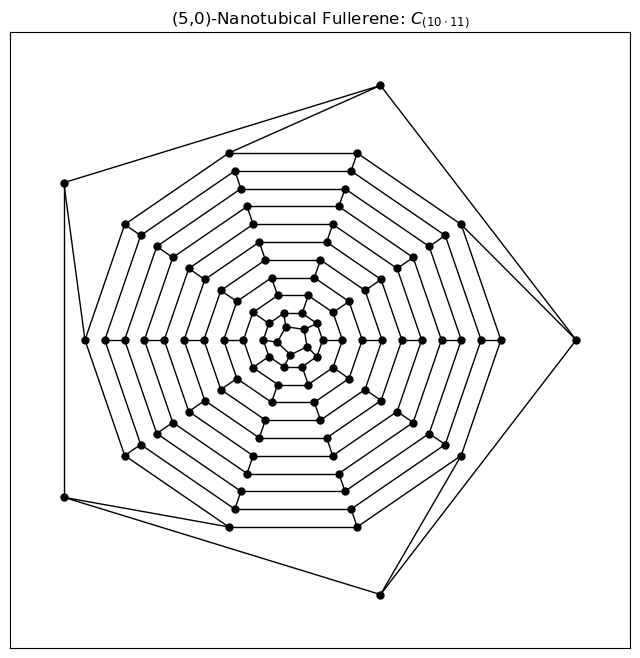

In [9]:
# Ustvari (5,0)-Nanotubical Fullerene graf za k=100 z zigzag povezavami
G = ntf(k=11, zigzag=True)

# Vizualiziraj graf
G.plot_graph(node_size=25, font_size=0, node_color="black", edge_color="black")

# Pretvori graf v različne formate
edge_list = G.convert_graph(format="edge_list")
adjacency_list = G.convert_graph(format="adjacency_list")
adjacency_matrix = G.convert_graph(format="adjacency_matrix")


In [8]:
primer_grafa = ntf(k=3, zigzag=True)
dist_matrix = floyd_warshall(primer_grafa.G)

# Izrišemo matriko distanc
for row in dist_matrix:
    print(row)

# dobimo vektor distanc
distance_vectors = vektor_razdalj(dist_matrix)

# Napišemo vektor distanc v lepi obliki
for node, vector in distance_vectors.items():
    print(f"Vozlišče {node} vektor razdalj: {vector}")

counts_per_node = vozlišča_na_ista_razdalji(distance_vectors)

# Napiše vrednosti koliko je vozlišč na isti razdalji za vsako vozlišče
for node, counts in counts_per_node.items():
    print(f"Vozlišče {node} Vektor razdalj: {counts}")

[0.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 5.0]
[1.0, 0.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0]
[2.0, 1.0, 0.0, 1.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0]
[2.0, 2.0, 1.0, 0.0, 1.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 6.0, 6.0, 5.0, 5.0, 5.0]
[1.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 5.0, 6.0, 6.0, 5.0, 5.0]
[2.0, 3.0, 4.0, 3.0, 2.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 5.0, 4.0, 3.0, 2.0, 3.0, 4.0, 5.0, 4.0, 3.0]
[1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0